# 클러스터링
- 최적 k 찾기
- 스케일링
- 원 핫 인코딩
- kMeans
- 고객세분화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.cluster import KMeans

## 데이터 읽기

In [3]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  28854      0 --:--:-- --:--:-- --:--:-- 29076


In [4]:
df = pd.read_csv('customer.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 원 핫 인코딩
- 성별을 One Hot Encoding 

In [7]:
df = pd.get_dummies(df, columns = ['Gender'])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

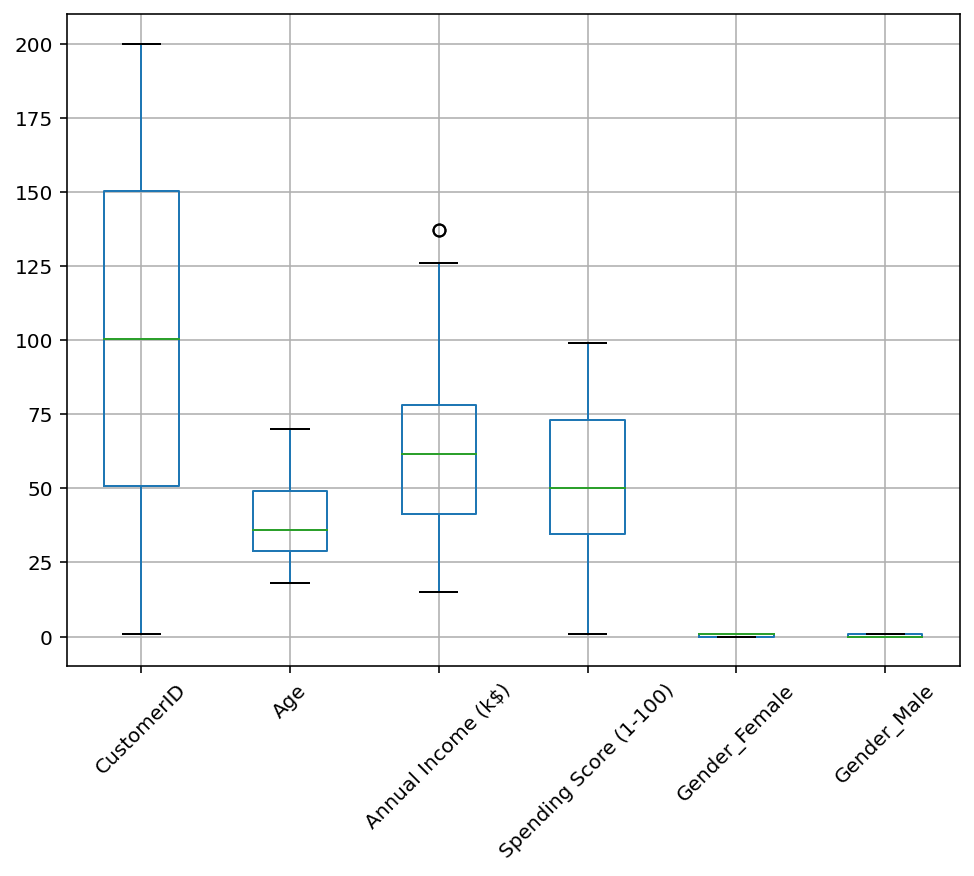

In [8]:
df.boxplot(figsize=(8,6))
plt.xticks(rotation=45)

In [9]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

## 두 개의 특성만 사용 (연속 값)

Text(0, 0.5, 'Spending Score (1-100)')

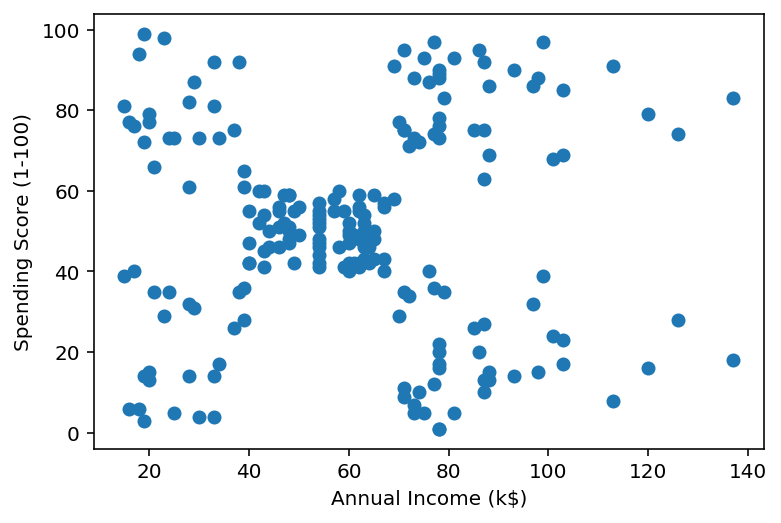

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## 스케일링

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous = ['Annual Income (k$)', 'Spending Score (1-100)','Age']
df_scale = scaler.fit_transform(df[continuous])
df_scale[:5] # 데이터프레임이 ndarray로 자동으로 변환된다

array([[-1.73899919, -0.43480148, -1.42456879],
       [-1.73899919,  1.19570407, -1.28103541],
       [-1.70082976, -1.71591298, -1.3528021 ],
       [-1.70082976,  1.04041783, -1.13750203],
       [-1.66266033, -0.39597992, -0.56336851]])

In [11]:
df[:5] # 원래의 데이터프레임은 그대로

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [13]:
df_scale[:5]

array([[-1.73899919, -0.43480148, -1.42456879],
       [-1.73899919,  1.19570407, -1.28103541],
       [-1.70082976, -1.71591298, -1.3528021 ],
       [-1.70082976,  1.04041783, -1.13750203],
       [-1.66266033, -0.39597992, -0.56336851]])

# 최적의 클러스터 수 찾기
- mass(inertia)의 변화 보기
- 실루엣 지수 보기

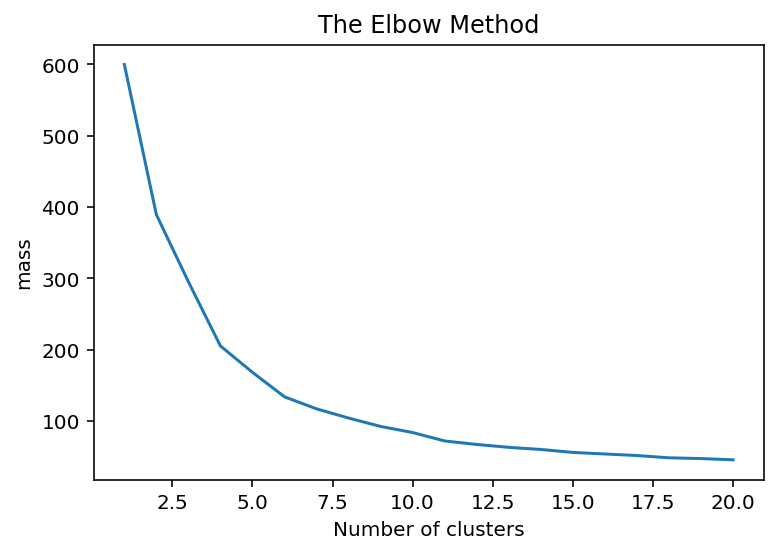

In [14]:
mass = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scale)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 21), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

# results ={}
results = []
for c in range(2,21):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df_scale)
  silhouette_avg = silhouette_score(df_scale, cluster_labels)
  results.append([c,silhouette_avg])

In [17]:
df_result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
df_result

,n_clusters,silhouette_score
0,2,0.335472
1,3,0.357793
2,4,0.403958
3,5,0.416643
4,6,0.427428
5,7,0.417232
6,8,0.410983
7,9,0.420644
8,10,0.400397
9,11,0.407185


## 두 개의 특성만 사용
- k=5 선택

In [18]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_scale)
y_kmeans = kmeans.predict(df_scale)
y_kmeans[:10]

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2], dtype=int32)

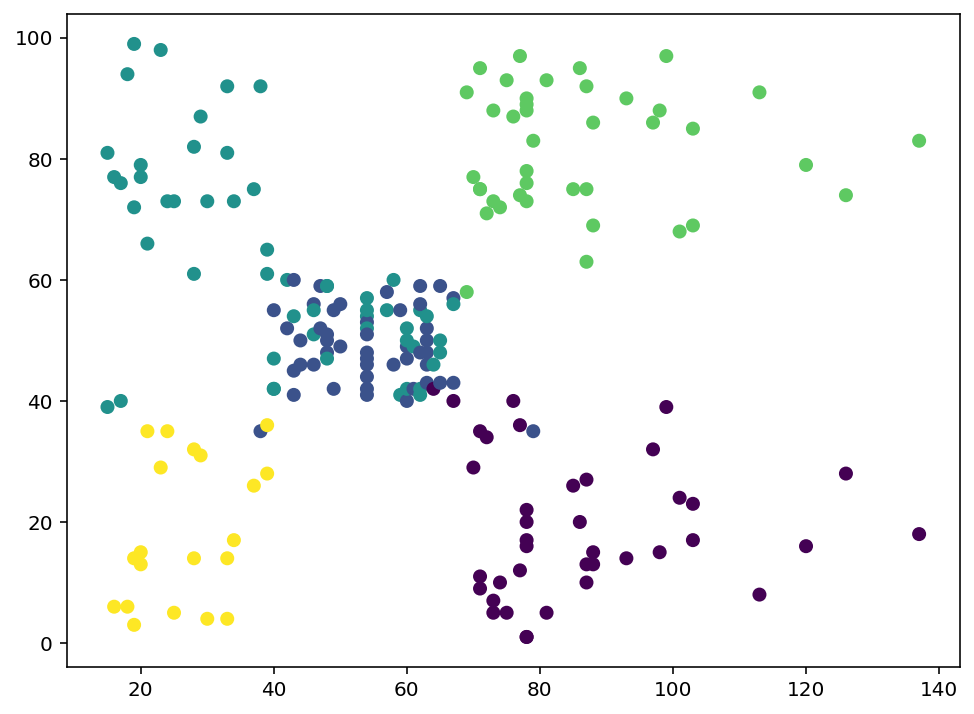

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans)

In [20]:
# 가까운 클러스터 예측하기
kmeans.predict([[0.9,-0.4],[-0.7,0.8]])

ValueError: ignored

In [22]:
df["cluster"] = y_kmeans
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,2
1,2,21,15,81,0,1,2
2,3,20,16,6,1,0,4
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,2


In [23]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male', 'cluster'],
      dtype='object')

In [24]:
df = df.drop(['CustomerID','cluster'], axis=1, errors='ignore')
df_new=df.copy()
df_new[continuous] = scaler.fit_transform(df_new[continuous])

In [25]:
df_new[:3]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0


In [30]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
df_pca2 = pca.fit_transform(df_new)
df_pca2.shape
# power_pca_scaled_pca2.shape

(200, 2)

Text(0, 0.5, 'PCA2')

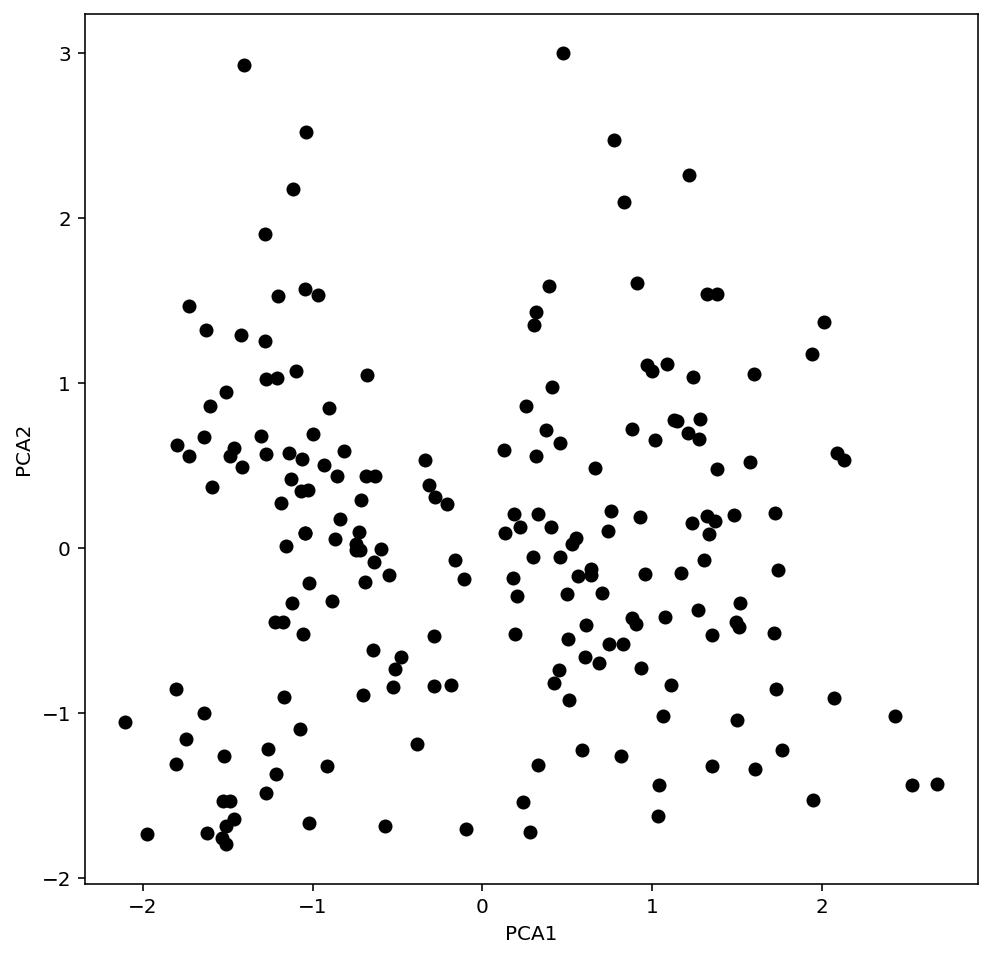

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(df_pca2[:,0], df_pca2[:,1],c='k',marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

## 모든 특성 사용한 클러스터링

- 최적의 k값 찾기
- mass(inertia), 실루엣 지수 검토

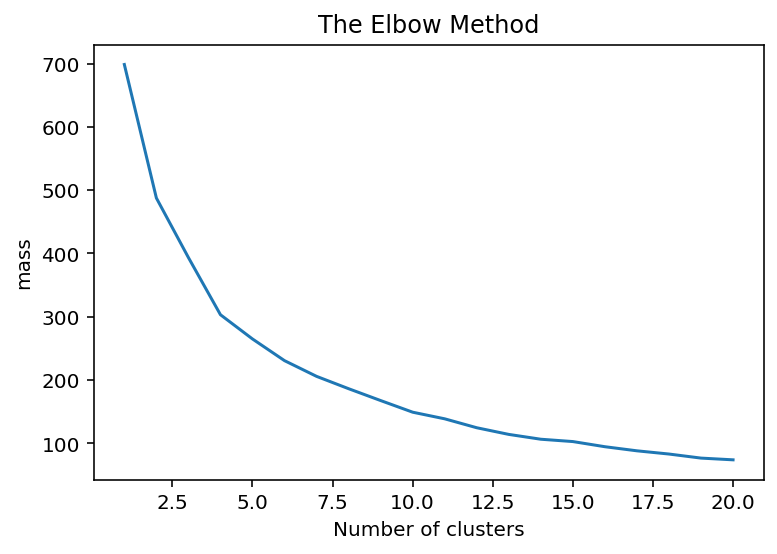

In [26]:
mass = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_new)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 21), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

In [27]:
results = []
for c in range(2,21):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df_new)
  silhouette_avg = silhouette_score(df_new, cluster_labels)
  results.append([c,silhouette_avg])

In [28]:
pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

,n_clusters,silhouette_score
0,2,0.282065
1,3,0.287249
2,4,0.319470
3,5,0.307407
4,6,0.317889
5,7,0.319203
6,8,0.324415
7,9,0.343500
8,10,0.360939
9,11,0.369413


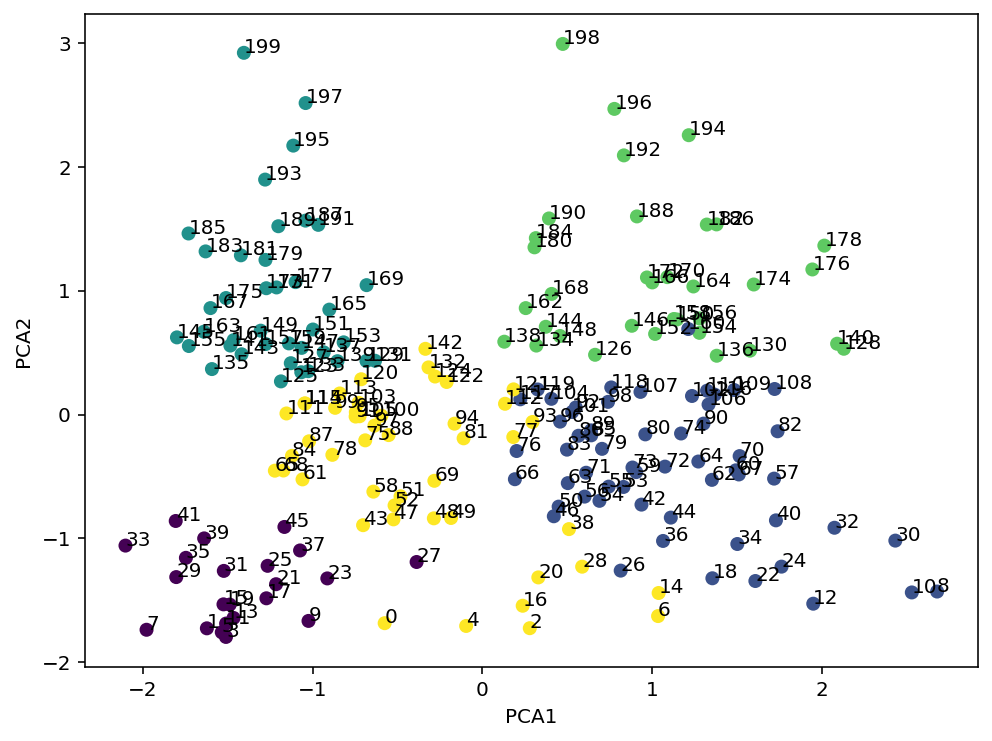

In [39]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df_new)
plt.figure(figsize=(8, 6))
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.scatter(df_pca2[:,0], df_pca2[:,1], 
                    c=y_kmeans)
for i in range(df_pca2.shape[0]):
    plt.text(df_pca2[i,0], df_pca2[i,1], df_new.index[i])



# plt.scatter(df_new['Age'], df_new['Spending Score (1-100)'], 
#                     c=y_kmeans)   

# my_markers=['*','^', 'o','^','.',',','1','2']
# my_color =['r','c','g','b','g','k','r','y']

# plt.figure(figsize=(10, 8))
# plt.xlabel('서비스업')
# plt.ylabel('제조업')
# for n in range(power.shape[0]):
#     label = k.labels_[n]
#     plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=30)
#     plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
# for i in range(k.n_clusters):
#     plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 100)



In [36]:
df_pca2.shape[0]
df_new.index

RangeIndex(start=0, stop=200, step=1)